In [50]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2.5

In [52]:
def getGalaxyData(snapshot):
    return np.genfromtxt('./Data/GalaxyData/GalaxyData_Snap.'+str(snapshot)+'.txt')
def getWebData(snapshot):
    return np.genfromtxt('./Data/WebData/galaxy_web_data.'+str(snapshot)+'.txt')

snap:  135  with bin from  0.0  to  0.2  has N entries:  154
snap:  135  with bin from  0.2  to  0.4  has N entries:  213
snap:  135  with bin from  0.4  to  0.6  has N entries:  86
snap:  135  with bin from  0.0  to  0.2  has N entries:  366
snap:  135  with bin from  0.2  to  0.4  has N entries:  629
snap:  135  with bin from  0.4  to  0.6  has N entries:  348
snap:  135  with bin from  0.6  to  0.8  has N entries:  26


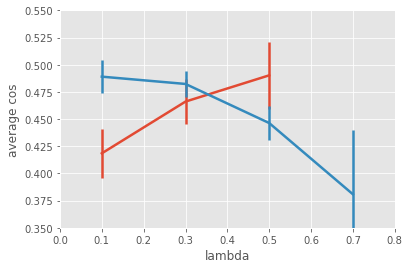

In [119]:
def plotCos(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1):
    galData=getGalaxyData(snapshot)
    webData=getWebData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5) & (webData[:,17]==0)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.median(np.abs(webData[inBin,15]))
        err[i]=np.std(np.abs(webData[inBin,15]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err)

cosLambda=plt.gca()
plotCos(cosLambda,135,3,0,0.6,massCut=5)
plotCos(cosLambda,135,4,0,0.8,massCut=5,plusMinus=-1)
#plotCos(cosLambda,116,2,0.1,0.5,massCut=5)
#plotCos(cosLambda,103,3,0,0.6,massCut=5,plusMinus=-1)
cosLambda.set_xlim(0,0.8)
cosLambda.set_ylim(0.35,0.55)
cosLambda.set_xlabel('lambda')
cosLambda.set_ylabel('average cos')
plt.show()

snap:  135  with bin from  0.0  to  0.15  has N entries:  250
snap:  135  with bin from  0.15  to  0.3  has N entries:  338
snap:  135  with bin from  0.3  to  0.45  has N entries:  211
snap:  135  with bin from  0.45  to  0.6  has N entries:  109
[  8.34570219e-05   6.89722812e-05   5.19944128e-05   4.98962316e-05]
snap:  116  with bin from  0.0  to  0.2  has N entries:  282
snap:  116  with bin from  0.2  to  0.4  has N entries:  313
snap:  116  with bin from  0.4  to  0.6  has N entries:  125
[ 0.00022116  0.00014165  0.00013243]
snap:  105  with bin from  0.0  to  0.233333333333  has N entries:  282
snap:  105  with bin from  0.233333333333  to  0.466666666667  has N entries:  273
snap:  105  with bin from  0.466666666667  to  0.7  has N entries:  64
[ 0.0002745   0.00014817  0.0001138 ]
snap:  85  with bin from  0.0  to  0.233333333333  has N entries:  112
snap:  85  with bin from  0.233333333333  to  0.466666666667  has N entries:  176
snap:  85  with bin from  0.466666666667  to

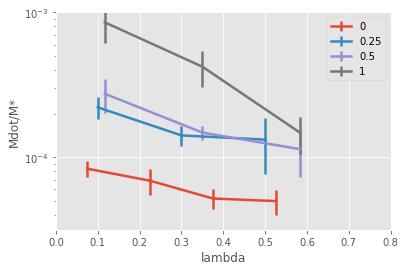

In [162]:
def plotAgn(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1,label='?'):
    galData=getGalaxyData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.mean(np.abs(galData[inBin,19]/galData[inBin,2]))
        err[i]=np.std(np.abs(galData[inBin,19]/galData[inBin,2]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err,label=label)
    print(average)
agnLambda=plt.gca()
plotAgn(agnLambda,135,4,0,0.6,massCut=5,label='0')
plotAgn(agnLambda,116,3,0,0.6,massCut=5,label='0.25')
plotAgn(agnLambda,105,3,0,0.7,massCut=5,label='0.5')
plotAgn(agnLambda,85,3,0,0.7,massCut=5,label='1')
agnLambda.legend()
#plotCos(cosLambda,116,2,0.1,0.5,massCut=5)
#plotCos(cosLambda,103,3,0,0.6,massCut=5,plusMinus=-1)
agnLambda.set_xlim(0,0.8)
agnLambda.set_ylim(10**-4.5,1e-3)
agnLambda.set_xlabel('lambda')
agnLambda.set_ylabel('Mdot/M*')
agnLambda.set_yscale('log')
plt.show()